# Cali Housing Data Exploration 


### We will be looking at the California Housing Data set from the StatLib repository. This dataset is based on data from the 1990 California census. It is not exactly recent, but it has many qualities for learning, I will be using it for practice. 

### Here is the link to the data set 

In [114]:
# importing the standard libraries to get started 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [118]:
# importing the data from the csv file and standard data cleaning in pandas

df = pd.read_csv(r'C:\Users\user\Math_Github\Back_Prop\Data\Cali_Housing_data.csv')
print(df.shape)
df = df.dropna()
print(df.nunique())

(20640, 10)
longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
median_house_value     3833
ocean_proximity           5
dtype: int64


In [117]:
# Normalizing the data and removing the outliers

from sklearn.preprocessing import StandardScaler
from scipy import stats

# Convert non-numeric values to NaN
numeric_cols = ["total_bedrooms", "total_rooms", "median_income", "latitude", "longitude", "households", "population"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Normalize the input features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(df[numeric_cols]))
threshold = 3  # Adjust the threshold as needed
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# Check the shape of the filtered data
print("Filtered Data Shape:", df_no_outliers.shape)

Filtered Data Shape: (19549, 10)


In [ ]:
# Starting to do some correlation analysis to see which variables are most correlated with eachother

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
corr

,total_bedrooms,total_rooms,median_income,latitude,longitude,households,population
total_bedrooms,1.000000,0.901207,-0.019651,-0.055443,0.045233,0.973819,0.842435
total_rooms,0.901207,1.000000,0.257774,-0.009874,0.009092,0.891989,0.798477
median_income,-0.019651,0.257774,1.000000,-0.082416,-0.015395,0.013894,-0.007134
latitude,-0.055443,-0.009874,-0.082416,1.000000,-0.924393,-0.067159,-0.127409
longitude,0.045233,0.009092,-0.015395,-0.924393,1.000000,0.035920,0.105016
households,0.973819,0.891989,0.013894,-0.067159,0.035920,1.000000,0.879800
population,0.842435,0.798477,-0.007134,-0.127409,0.105016,0.879800,1.000000


#### What does the data mean?? 

Quickly examining the data, we are able to see that the data has a 1.00 with itself, as it should. When we start seeing the data with other variables, we start to get diffrent numbers. 1 being the most correlated, and -1 being the least correlated. So for example, we can see that the Total rooms and the Median house value are positively correlated, meaning that as the total rooms increase, the median house value increases.

On the other hand we are able to see that the median income and the median house value are also positively correlated, meaning that as the median income increases, the median house value increases.

When looking that some of the negative numbers, we can see that the total amount of bedrooms and the median income are negatively correlated, meaning that as the total amount of bedrooms increases, the median house value decreases.

#### Lets take a look and make a few graphs to visualize the data before diving into the more complex Data Exploration

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='households', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='longitude', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='population', 

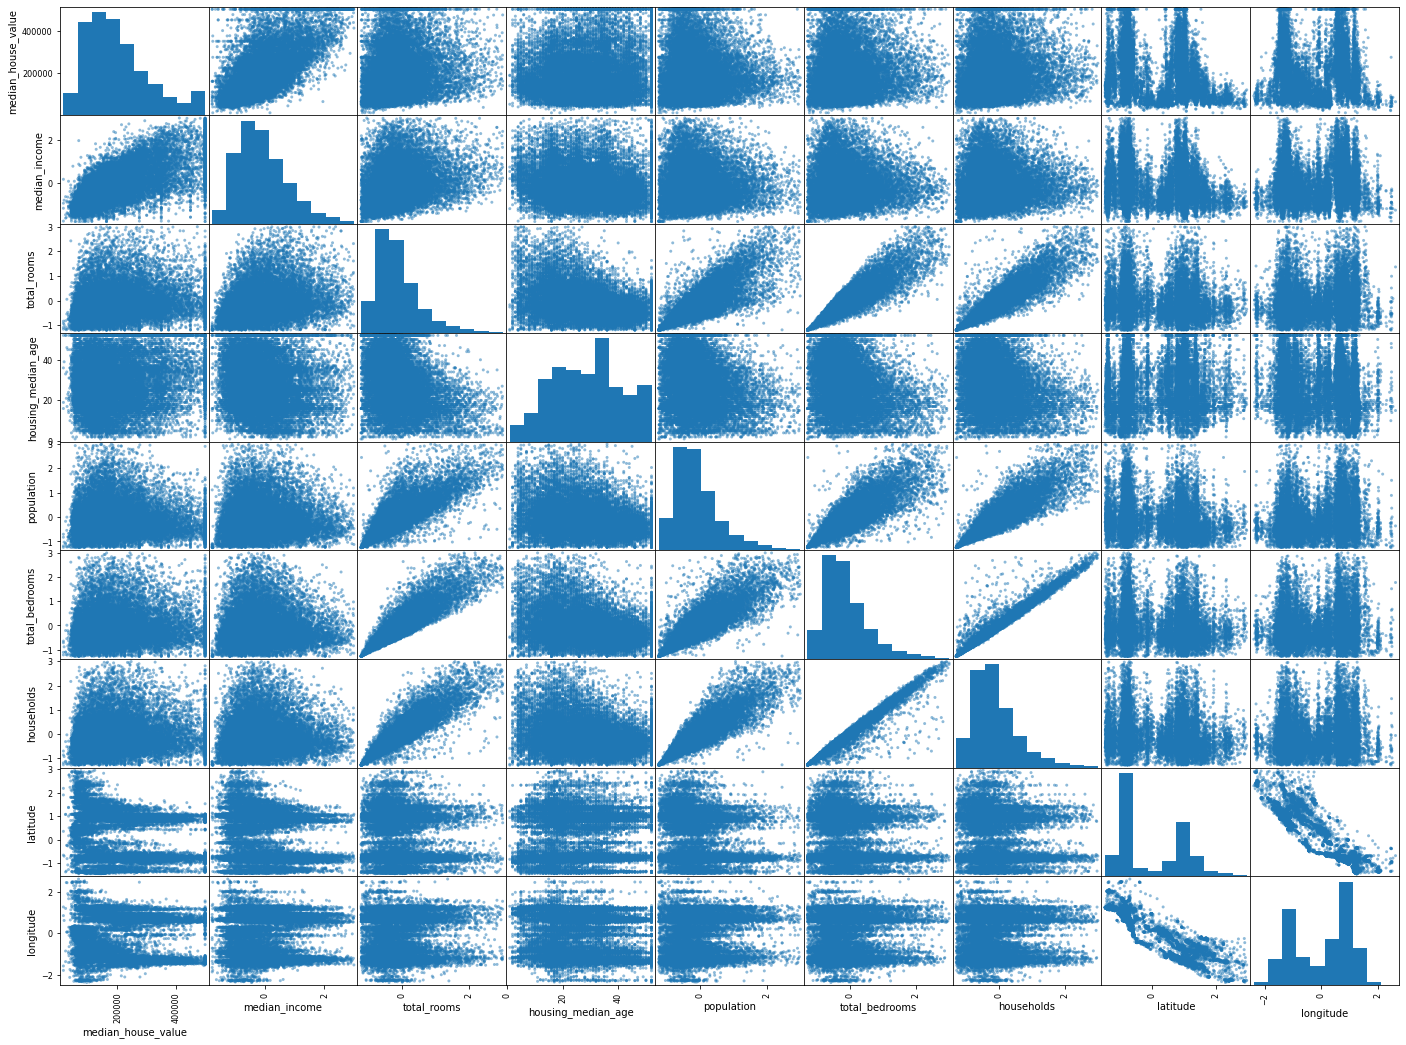

In [119]:
# Plotting a grid of scatter plots to see the relationships between the variables

from pandas.plotting import scatter_matrix 

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "population", "total_bedrooms", "households", "latitude", "longitude"]
scatter_matrix(df_no_outliers[attributes], figsize=(24, 18))

### Now lets start exploring some of the data more in depth

####  - Our Target Variable is the Median House Value

We are going to be doing four diffrent kinds of Linear Regression, and we are going to be using the same data set for all of them.

we are going to be usng the following four types of linear regression:

- Simple Linear Regression
- Multiple Linear Regression
- Polynomial Linear Regression
- Ridge Regression


In [120]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
df_train, df_test = train_test_split(df_no_outliers, test_size=0.2, random_state=42)

# Extract the input features and target variable
X_train = df_train[["total_bedrooms", "total_rooms"]]
y_train = df_train["median_house_value"]
X_test = df_test[["total_bedrooms", "total_rooms"]]
y_test = df_test["median_house_value"]



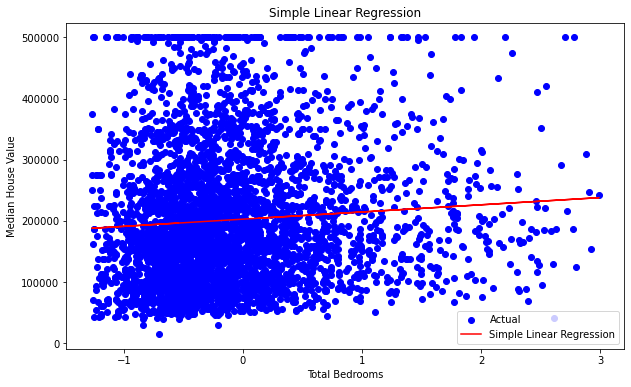

In [121]:
# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train[["total_bedrooms"]], y_train)
y_pred_lr = lr.predict(X_test[["total_bedrooms"]])

plt.figure(figsize=(10, 6))
plt.scatter(X_test["total_bedrooms"], y_test, color="b", label="Actual")
plt.plot(X_test["total_bedrooms"], y_pred_lr, color="r", label="Simple Linear Regression")
plt.xlabel("Total Bedrooms")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Simple Linear Regression")
plt.show()

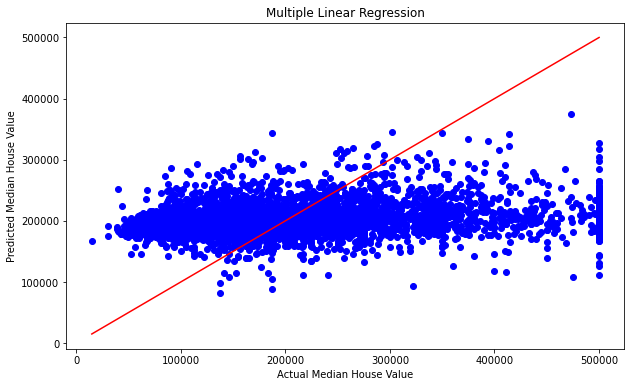

In [122]:
# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlr, color="b")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="r")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Multiple Linear Regression")
plt.show()


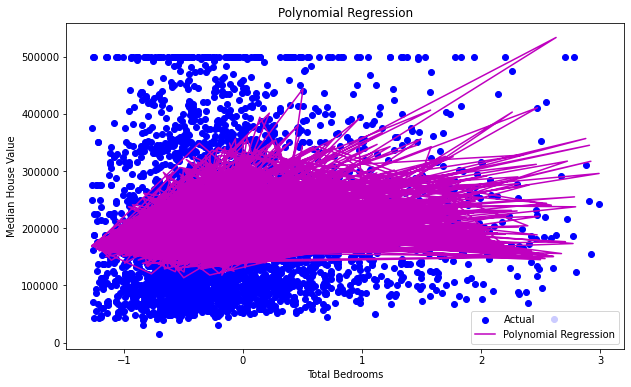

In [123]:
# Polynomial Regression (quadratic)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred_poly = poly_regression.predict(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_test["total_bedrooms"], y_test, color="b", label="Actual")
plt.plot(X_test["total_bedrooms"], y_pred_poly, color="m", label="Polynomial Regression")
plt.xlabel("Total Bedrooms")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Polynomial Regression")
plt.show()

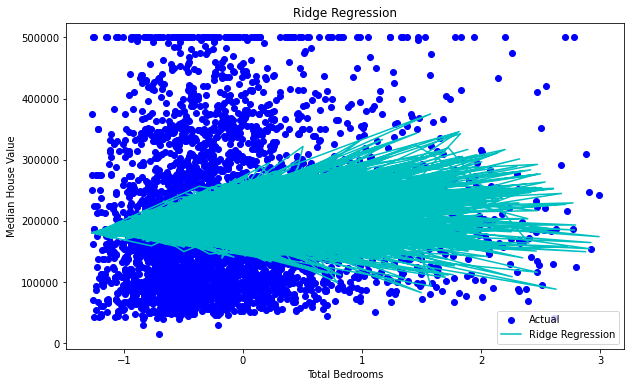

In [124]:
# Ridge Regression
ridge = Ridge(alpha=0.5) 
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test["total_bedrooms"], y_test, color="b", label="Actual")
plt.plot(X_test["total_bedrooms"], y_pred_ridge, color="c", label="Ridge Regression")
plt.xlabel("Total Bedrooms")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Ridge Regression")
plt.show()

#### In this section we are going to be calculating the MSE (Mean Squared Error) and the RMSE (Root Mean Squared Error) for each of the four types of linear regression.

#### We are also going to be calculating the R^2 (Coefficient of Determination) for each of the four types of linear regression.

the mse and rmse are going to be calculated using the following formulas:
MSE: 1/n * sum(yi - yhat)^2
RMSE: sqrt(1/n * sum(yi - yhat)^2)

The R^2 is going to be calculated using the following formula:
R^2: 1 - (sum(yi - yhat)^2 / sum(yi - ybar)^2)

we are going to have the simple linear regression as the baseline for the other three types of linear regression.



In [125]:
# Libraries 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [126]:
# Extract the input features and target variable
X_train = df_train[["total_bedrooms" ]]
y_train = df_train["median_house_value"]
X_test = df_test[["total_bedrooms"]]
y_test = df_test["median_house_value"]

In [127]:
# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Simple Linear Regression:")
print("MSE:", mse_lr)
print("R-squared:", r2_lr)
print()

Simple Linear Regression:
MSE: 12331402442.075071
R-squared: 0.00699637767558603



In [128]:
# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

print("Multiple Linear Regression:")
print("MSE:", mse_mlr)
print("R-squared:", r2_mlr)
print()

Multiple Linear Regression:
MSE: 12331402442.075071
R-squared: 0.00699637767558603



In [129]:
# Polynomial Regression (quadratic)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred_poly = poly_regression.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (quadratic):")
print("MSE:", mse_poly)
print("R-squared:", r2_poly)
print()


Polynomial Regression (quadratic):
MSE: 12316780885.56662
R-squared: 0.008173799193139764



In [130]:
# Polynomial Regression (quadratic)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred_poly = poly_regression.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (quadratic):")
print("MSE:", mse_poly)
print("R-squared:", r2_poly)
print()

Polynomial Regression (quadratic):
MSE: 12316780885.56662
R-squared: 0.008173799193139764



In [131]:
# Ridge Regression
ridge = Ridge(alpha=0.5)  # You can adjust the alpha value
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("MSE:", mse_ridge)
print("R-squared:", r2_ridge)

Ridge Regression:
MSE: 12331403867.421118
R-squared: 0.006996262897579819


## Explainig the data and What it means

#### The MSE (Mean Squared Error) - The MSE is the average of the squared differences between the predicted and actual values. It is a measure of how close a fitted line is to actual data points. The smaller the MSE, the closer the fit is to the data.

So with that being said, when we see the MSE: at 4921885924.748224 the data suggest that the predicted values differ from the actual values by the square root of 4921885924.748224. With that being said the predictive values diffred from the actual values by 2,217,853.78 of the median house value. Approx 2.2 million dollars, from the actual median house value.

#### The RMSE (Root Mean Squared Error) - The RMSE is the square root of the average of the squared differences between the predicted and actual values. It is a measure of how close a fitted line is to actual data points. The smaller the RMSE, the closer the fit is to the data.

Coming the the conclusion, that the  R-squared value is 0.6400862261528937, or only 64% of the variance in the median house value is explained by the model. This is not a very good model, and we can see that the data is not very accurate. 

We can see the best we got was, RSME score of 0.6982497142436541, which is approx 70% of the variance in the median house value is explained by the model. This data may not be the best data to go off of, but we only did two columns. We can see that the data is not very accurate, however, what happens when we add more columns to the data set?


We are going to be skipping some of the data showcasing and we are quickly going to be jumping into the regression models. We will circle back and find the best model for the data set. When making a machine learning model, we have to find the best kind of regression, along with finding the best hyperparameters for the model, to make sure the model is as accurate as possible. If we are feeding it the wrong kind of data, with the wrong kind of regression, we are going to get a bad model, and end up wasting time and money. 

In [137]:
# Speed run 

# Split the data into training and testing sets
df_train, df_test = train_test_split(df_no_outliers, test_size=0.2, random_state=42)

# Extract the input features and target variable
X_train = df_train[["total_bedrooms", "total_rooms"]]
y_train = df_train["median_house_value"]
X_test = df_test[["total_bedrooms", "total_rooms"]]
y_test = df_test["median_house_value"]

# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Simple Linear Regression:")
print("MSE:", mse_lr)
print("R-squared:", r2_lr)
print()

# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

print("Multiple Linear Regression:")
print("MSE:", mse_mlr)
print("R-squared:", r2_mlr)
print()

# Polynomial Regression (quadratic)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred_poly = poly_regression.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (quadratic):")
print("MSE:", mse_poly)
print("R-squared:", r2_poly)
print()

# Ridge Regression
ridge = Ridge(alpha=0.5)  # You can adjust the alpha value
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("MSE:", mse_ridge)
print("R-squared:", r2_ridge)


Simple Linear Regression:
MSE: 11672601481.026249
R-squared: 0.06004725682621426

Multiple Linear Regression:
MSE: 11672601481.026249
R-squared: 0.06004725682621426

Polynomial Regression (quadratic):
MSE: 10937567375.464468
R-squared: 0.11923691775759582

Ridge Regression:
MSE: 11672567588.051132
R-squared: 0.06004998610597134


In [133]:
# Adding median income to all of the data
# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Extract the input features and target variable
X_train = df_train[["total_bedrooms", "total_rooms", "median_income"]]
y_train = df_train["median_house_value"]
X_test = df_test[["total_bedrooms", "total_rooms", "median_income"]]
y_test = df_test["median_house_value"]

# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Simple Linear Regression:")
print("MSE:", mse_lr)
print("R-squared:", r2_lr)
print()

# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

print("Multiple Linear Regression:")
print("MSE:", mse_mlr)
print("R-squared:", r2_mlr)
print()

# Polynomial Regression (quadratic)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred_poly = poly_regression.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (quadratic):")
print("MSE:", mse_poly)
print("R-squared:", r2_poly)
print()

# Ridge Regression
ridge = Ridge(alpha=0.5)  # You can adjust the alpha value
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("MSE:", mse_ridge)
print("R-squared:", r2_ridge)


Simple Linear Regression:
MSE: 6730530616.562535
R-squared: 0.5078287649821078

Multiple Linear Regression:
MSE: 6730530616.562535
R-squared: 0.5078287649821078

Polynomial Regression (quadratic):
MSE: 6181391228.426044
R-squared: 0.5479846793153735

Ridge Regression:
MSE: 6730532558.487165
R-squared: 0.5078286229785277


In [138]:
# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Extract the input features and target variable
X_train = df_train[["total_bedrooms", "total_rooms", "median_income", "latitude", "longitude"]]
y_train = df_train["median_house_value"]
X_test = df_test[["total_bedrooms", "total_rooms", "median_income", "latitude", "longitude"]]
y_test = df_test["median_house_value"]

# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Simple Linear Regression:")
print("MSE:", mse_lr)
print("R-squared:", r2_lr)
print()

# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

print("Multiple Linear Regression:")
print("MSE:", mse_mlr)
print("R-squared:", r2_mlr)
print()

# Polynomial Regression (quadratic)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred_poly = poly_regression.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (quadratic):")
print("MSE:", mse_poly)
print("R-squared:", r2_poly)
print()

# Ridge Regression
ridge = Ridge(alpha=0.5)  # You can adjust the alpha value
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("MSE:", mse_ridge)
print("R-squared:", r2_ridge)

Simple Linear Regression:
MSE: 5499217065.093908
R-squared: 0.5978687849813171

Multiple Linear Regression:
MSE: 5499217065.093908
R-squared: 0.5978687849813171

Polynomial Regression (quadratic):
MSE: 4979558776.019012
R-squared: 0.6358688887609356

Ridge Regression:
MSE: 5499227304.901036
R-squared: 0.5978680361936201


In [135]:
# Adding House holds to all of the data

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Extract the input features and target variable
X_train = df_train[["total_bedrooms", "total_rooms", "median_income", "latitude", "longitude", "households"]]
y_train = df_train["median_house_value"]
X_test = df_test[["total_bedrooms", "total_rooms", "median_income", "latitude", "longitude", "households"]]
y_test = df_test["median_house_value"]

# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Simple Linear Regression:")
print("MSE:", mse_lr)
print("R-squared:", r2_lr)
print()

# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

print("Multiple Linear Regression:")
print("MSE:", mse_mlr)
print("R-squared:", r2_mlr)
print()

# Polynomial Regression (quadratic)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred_poly = poly_regression.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (quadratic):")
print("MSE:", mse_poly)
print("R-squared:", r2_poly)
print()

# Ridge Regression
ridge = Ridge(alpha=0.5)  # You can adjust the alpha value
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("MSE:", mse_ridge)
print("R-squared:", r2_ridge)

Simple Linear Regression:
MSE: 5474242900.693428
R-squared: 0.5996950251452468

Multiple Linear Regression:
MSE: 5474242900.693428
R-squared: 0.5996950251452468

Polynomial Regression (quadratic):
MSE: 4950379563.823059
R-squared: 0.6380026237844405

Ridge Regression:
MSE: 5474252526.736843
R-squared: 0.599694321239129


In [139]:
# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Extract the input features and target variable
X_train = df_train[["total_bedrooms", "total_rooms", "median_income", "latitude", "longitude", "households", "population"]]
y_train = df_train["median_house_value"]
X_test = df_test[["total_bedrooms", "total_rooms", "median_income", "latitude", "longitude", "households", "population"]]
y_test = df_test["median_house_value"]

# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Simple Linear Regression:")
print("MSE:", mse_lr)
print("R-squared:", r2_lr)
print()

# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

print("Multiple Linear Regression:")
print("MSE:", mse_mlr)
print("R-squared:", r2_mlr)
print()

# Polynomial Regression (quadratic)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred_poly = poly_regression.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (quadratic):")
print("MSE:", mse_poly)
print("R-squared:", r2_poly)
print()

# Ridge Regression
ridge = Ridge(alpha=0.5)  # You can adjust the alpha value
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("MSE:", mse_ridge)
print("R-squared:", r2_ridge)


Simple Linear Regression:
MSE: 5095211726.158182
R-squared: 0.6274117464424108

Multiple Linear Regression:
MSE: 5095211726.158182
R-squared: 0.6274117464424108

Polynomial Regression (quadratic):
MSE: 4460555990.14718
R-squared: 0.6738210587535485

Ridge Regression:
MSE: 5095217649.154921
R-squared: 0.6274113133222328


### As we can see from all of the code from above, the tests are having a very hard time breaking over, 70% accuracy. That means we should look at changing the data or we should start looking at changing some of the hyperparameters for the models, and start to re-test. 